# Sampling

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## 1-dimensional Gaussian probability density function (PDF), $ \mathcal{N}(\mu, \sigma^{2})$

In [5]:
class GaussianPDF:

    def __init__(self, mean, stddev):
        self.mean = mean
        self.stddev = stddev

    def __call__(self, x):
        return np.exp(-np.square((x - self.mean) / self.stddev) / 2) / (self.stddev * np.sqrt(2 * np.pi))

## [Rejection sampling](https://en.wikipedia.org/wiki/Rejection_sampling)

1. Sample a point on the x-axis from the proposal distribution (uniform distribution $ U $ here).
2. Draw a vertical line at this x-position, up to the curve of the proposal distribution (normal distribution $ \mathcal{N} $ here).
3. Sample uniformly along this line from 0 to the maximum of the probability density function.  
If the sampled value is greater than the value of the desired distribution at this vertical line, return to step 1.

In [6]:
def rejection_sampling(f, interval, maximum):
    left, right = interval
    x = np.random.uniform(left, right)
    y = np.random.uniform(0, maximum)
    if f(x) > y:
        return x
    else:
        return rejection_sampling(f, interval, maximum)

## [Sampling from a normal distribution](https://en.wikipedia.org/wiki/Normal_distribution#Generating_values_from_normal_distribution)

### [Sum of 12 uniform distributions (Irwin-Hall)](https://en.wikipedia.org/wiki/Irwin–Hall_distribution)

$$ X = \sum_{i = 1}^{12} U[-b, b] $$


In [10]:
def normal_uniform_sum(mean, stddev):
    return sum(np.random.uniform(-stddev, stddev) for _ in range(12)) / 2 + mean

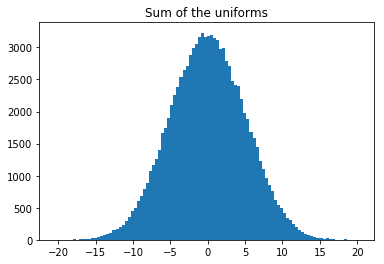

In [18]:
samples = [normal_uniform_sum(0, 5) for _ in range(100000)]
plt.hist(samples, bins=100)
plt.title("Sum of the uniforms")
plt.show()

### Using the rejection sampling

In [12]:
def normal_rejection(mean, stddev):
    f = GaussianPDF(mean, stddev)
    return rejection_sampling(f, (-6 * stddev, 6 * stddev), f(mean))

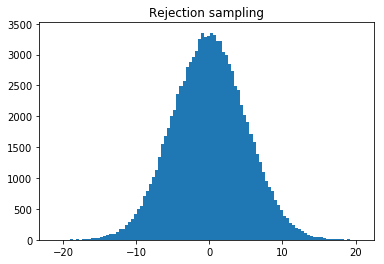

In [21]:
samples = [normal_rejection(0, 5) for _ in range(100000)]
plt.hist(samples, bins=100)
plt.title("Rejection sampling")
plt.show()

### [Using the Box–Muller transform](https://en.wikipedia.org/wiki/Box–Muller_transform)

$$ u_1 \sim U[0, 1] $$
$$ u_2 \sim U[0, 1] $$

$$ X = \cos{2\pi u_1} \sqrt{-2 \log{u_2}} $$

In [15]:
def normal_box_muller(mean, stddev):
    u1 = np.random.uniform()
    u2 = np.random.uniform()
    return np.cos(2 * np.pi * u1) * np.sqrt(-2 * np.log(u2)) * stddev + mean

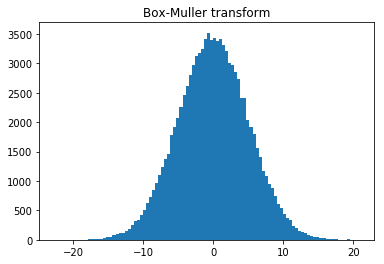

In [23]:
samples = [normal_box_muller(0, 5) for _ in range(100000)]
plt.hist(samples, bins=100)
plt.title("Box-Muller transform")
plt.show()